# Week4 - Homework 1

### Complete _todo_ parts in the following:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
def create_df():
    df = pd.DataFrame()
    n = 10000
    x = np.linspace(0, 2*np.pi, n)
    y = 2*np.cosh(x/2) + np.random.normal(0, 3, n)

    x2 = random.choices(['A', 'B'], k=n)

    df['X1'] = x
    df['X2'] = x2
    df['y'] = [ y + 5 if b == 'A' else  y for y, b in zip(y, x2)]
    return df

df = create_df()

In [3]:
df.head()

,X1,X2,y
0,0.000000,A,8.416352
1,0.000628,A,10.064114
2,0.001257,A,6.834181
3,0.001885,A,7.984397
4,0.002514,A,9.255753


<Axes: title={'center': 'Scatterplot of X1 vs y with influence of A and B(X2 column) '}, xlabel='X1', ylabel='y'>

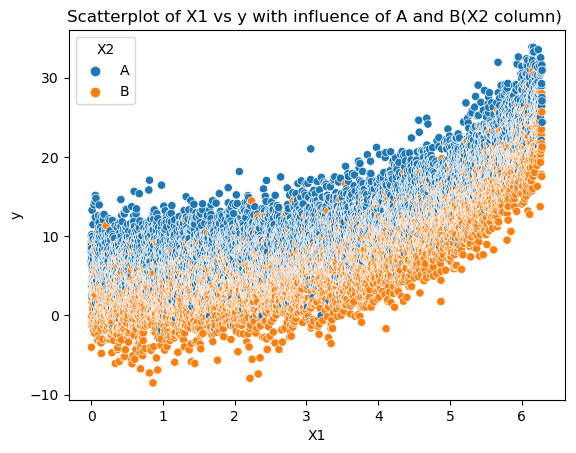

In [4]:
plt.title('Scatterplot of X1 vs y with influence of A and B(X2 column) ')

sns.scatterplot(data=df, x='X1', y='y', hue='X2')

# Interpretation
    1. The Values of A are higher than B because y values are incremented by 5 when X2 == 'A'
    2. The values of X1 and y increases but A has significant increment over B. 
    3. Some overlap could be also been seen due to the noise added during the creation of y using np.random.normal(0, 3, n)

<Axes: title={'center': 'Scatterplot of a sample of 1000 of X1 vs y with influence of A and B(X2 column) '}, xlabel='X1', ylabel='y'>

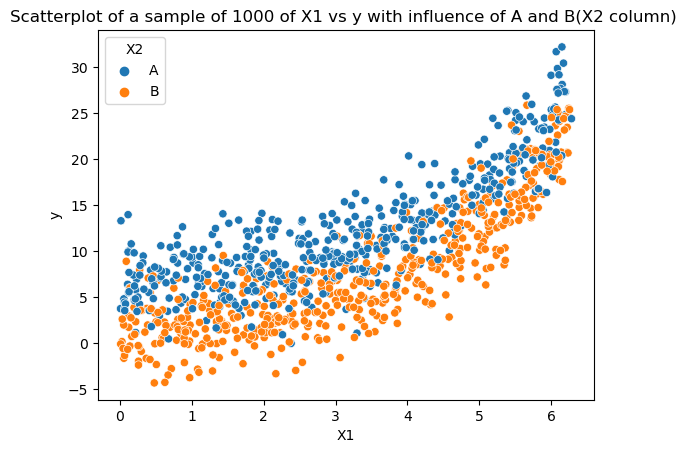

In [5]:
# todo: add the same title as above
plt.title('Scatterplot of a sample of 1000 of X1 vs y with influence of A and B(X2 column) ')
sns.scatterplot(data=df.sample(1000), x='X1', y='y', hue='X2')

#### Interpretation:
1. The X axis has the values of column X1  which ranges from 0 to around 6.28 (approximately 2π) and Y axis has values of y column 
2. The scatter plot a also uses categorical values of A and B
3. The shape is non linear hyperbolic and constantly increasing (mostly because we added 5 to A)

In [6]:
X = df[['X1', 'X2']]
y = df.y

In [7]:
X.head()

,X1,X2
0,0.000000,A
1,0.000628,A
2,0.001257,A
3,0.001885,A
4,0.002514,A


In [8]:
model = LinearRegression()
model.fit(X[['X1']], y)

model.score(X[['X1']], y) 

0.5873059406571233

In [9]:
y_pred = model.predict(X[['X1']])
r2_score( y, y_pred)

0.5873059406571233

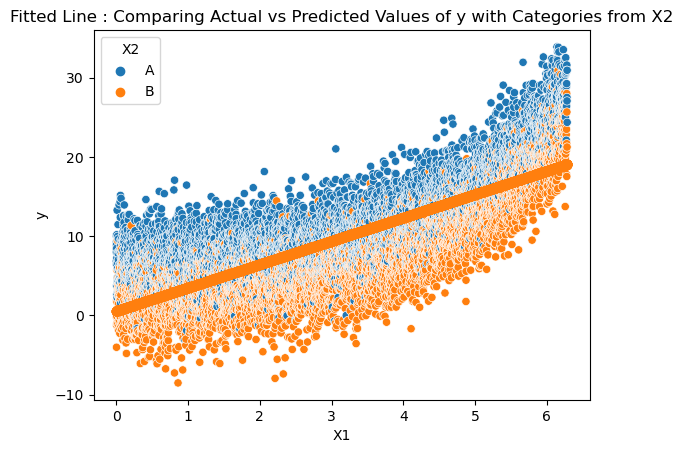

In [10]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
#plt.scatter(X.X1, y) 
#plt.scatter(X.X1, y_pred)

# todo: add a proper title
plt.title('Fitted Line : Comparing Actual vs Predicted Values of y with Categories from X2')
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

# Interpretation:
1. The data of X1 and Y do not show a clear linear relationship. It is a curve due to the use of cosine function
2. The predicted values are superimposed on the actual values. The resultant is a straight line.
3. This line is not the correct representation because it does not capture the correct relationship which is non linear.This  line does not consider X2 column   

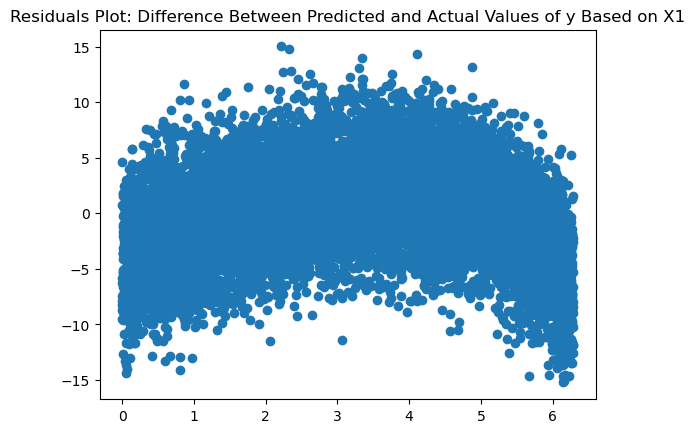

In [11]:
# todo: add a proper title
plt.title('Residuals Plot: Difference Between Predicted and Actual Values of y Based on X1') #xaxis has X1 and Y pred - y on y axis
plt.scatter(X.X1, y_pred-y)

# Interpretation:
The plot has predicted values - actual values on Y  axis and observations  on x axis.
1. This is a residual that shows how far the difference is of the predicted and accurate data.
2. Ideally the scatter plot should not show a pattern. However, in the above plot it shows a curved pattern.
3. This shows that the model does not actually capture the details and relationship of X1 and Y 

<Axes: title={'center': 'Histogram of Residuals simple regression (y_pred -y ) '}>

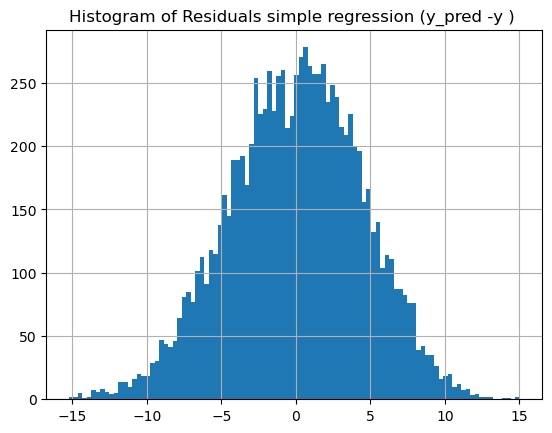

In [12]:
# todo: add a proper title
plt.title('Histogram of Residuals simple regression (y_pred -y ) ') 
(y_pred-y).hist(bins=100)

# Interpretation:
X-axis represents the actual residual values themselves ( y_pred - y).  The y-axis in the histogram represents the frequency or count of residuals that fall within each bin
1. The histogram has a bell-shaped curve, indicating that the residuals are approximately normally distributed.
2. The highest concentration of residuals is around 0, which suggests that the model's predictions do not make a lot of errors.
3. As there is no one side that is dominating. Symmetry in the residuals indicates that the model’s predictions are unbiased.

#### Todo: 
Explain findings in the graphs above & what we can try next

# What we can try next
1. Include the X2 factor
2. Include the Polynomial regression to work with the non linear relationship
3. Ridge and Lasso to penalize and adjust the relationship

In [13]:
# todo: explain the code below, what we do & why we do it? 

#create an instance of PolynomialFeatures from scikit-learn to create a polynomial of degree 2.
transform = PolynomialFeatures(degree=2)

# Applying the polynomial transformation to X1
X_data = transform.fit_transform(X[['X1']]) 

# creates a new instance of the linear regression model from scikit-learn.
model = LinearRegression()
#linear regression model using polynomial of 2 degree
model.fit(X_data, y)
#Calculating the Rsquare value to get the fitting accuracy 
model.score(X_data, y) 

0.6795618799595708

This expands the original feature space, allowing the model to fit a more complex (nonlinear) relationship between X1 and y.

In [14]:
#Using the trained polynomial fitted data to predict values and store in y_pred
y_pred = model.predict(X_data)
#Rsquare value that compares the true y values and the predicted y_pred values from the model.
r2_score(y, y_pred)

0.6795618799595708

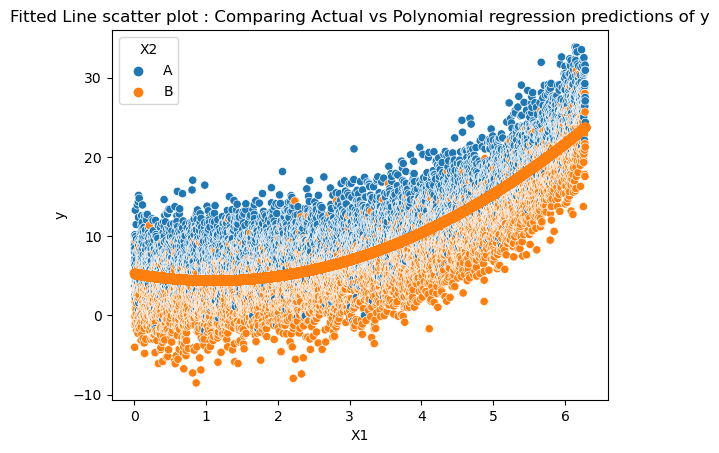

In [15]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_data[:, 1], y)
# plt.scatter(X_data[:, 1], y_pred)


# todo: add a proper title
plt.title('Fitted Line scatter plot : Comparing Actual vs Polynomial regression predictions of y')
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X.X1, y_pred)

# Interpretations:
1. The graph has the values of X1 and y plotted categorically using A and B and a curve upward Line 
2. The first model showed a clear linear relationship which was incorrect. But now the polynomial regression shows a better relationship i.e a curved line can be seen which is more accurate compared to the previous one.

<Axes: title={'center': 'Residuals Plot: Difference Between Polynomial Regression Predicted values and Actual Values of y'}>

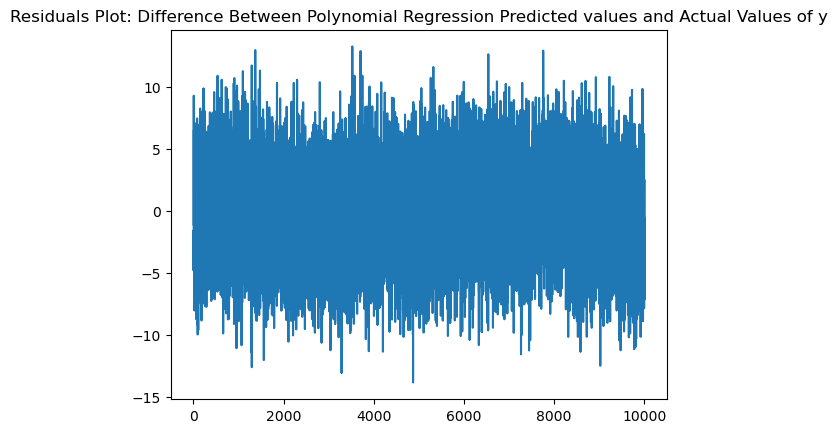

In [16]:
# todo: add a proper title

plt.title('Residuals Plot: Difference Between Polynomial Regression Predicted values and Actual Values of y') #xaxis has X1 and Y pred - y on y axis

(y_pred-y).plot()

# Interpretaion 
The plot has predicted values - actual values on Y  axis and observations  on x axis.
1. The Residual plot shows the difference between the Polynomial Prediction Values and the Actual ones.
2. The Values are not supposed to form a pattern. In the above case the residual values look fairly random Unlike a clear curve in the simple regression above,
3. The variance seems to be consistent. This residual plot suggests that the model has a fairly random distribution of errors.

<Axes: title={'center': 'Histogram of Residuals of polynomial regression (y_pred -y ) '}>

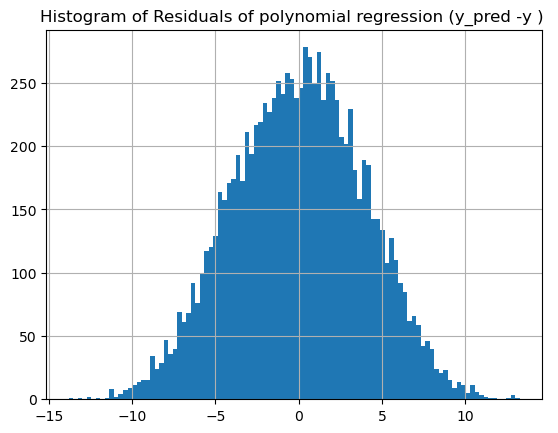

In [17]:
# todo: add a proper title
plt.title('Histogram of Residuals of polynomial regression (y_pred -y ) ') 
(y_pred-y).hist(bins=100)

# Interpretation:
1. This is a bell shaped graph. Which shows that it is evenly distributed and makes errors evenly.
2. THe distribution is limited till +/- 10 which shows that this is limited to making smaller errors.
3. Skewed around 0 which shows there errors are less

### Todo:
Explain findings in the above graphs & what can we do next? 

What can we do next?
1. Include Categorical variables 
Now that we have incorporated polynomial regression we are capturing the curve but now to make it more accurate we can use categorical variables. Categorical variables X2 have significant effect on the model. Hence, involving it through OneHotEncoding can be a good option.
2. Lasso and Ridge
If it is observed that the model is overfitting. Then Lasso and Ridge can be used to penalize and get a more accurate version
3. Different Model or Features  
We can try to check different non linear models to check which one fits the best. and if any new feature can be introduced to make it more accurate.
4. Residual Diagnostic tests
We can again run residual diagnostic tests to check if theres any bias i.e normality, variance, and randomness.
5. Check for outliers
Checking if there are any outliers and considering their nature and importance to check if they can be removed or adjusted to get a better model.


##  Finally:

In [18]:
## to see the difference (leave these blocks commented when submitting)
# encoder = OneHotEncoder()

# categorical_features = ['X2']
# encoded = encoder.fit_transform(X[categorical_features])

# pd.DataFrame(
#     data=encoded.todense(), 
#     columns=encoder.get_feature_names_out()
# ).head()

In [19]:
#creating a OneHotEncoder instance that drops the first row as it is binary. Even after eliminating one another can be accessed 
encoder = OneHotEncoder(drop='first')
#Specifying the column that is to be encoded
categorical_features = ['X2']
#OneHotEncoder is fitted which transforms the data into a sparse matrix
encoded = encoder.fit_transform(X[categorical_features])

In [20]:
#converting the dense matrix to a pandas dataframe 
encoded_df = pd.DataFrame(
    #converting the sparse to a dense matrix (a regular array)
    data=encoded.todense(), 
    #this method generates appropriate column name (X2_B)
    columns=encoder.get_feature_names_out()
)

In [21]:
encoded_df.head()

,X2_B
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [22]:
# todo: explain the code
#adding the numerical features X1 and adding it to with the categorical 
numerical_features = ['X1']
#joining the numerical feature with encoded data
X_new = X[numerical_features].join(encoded_df)
X_new.head()

,X1,X2_B
0,0.000000,0.0
1,0.000628,0.0
2,0.001257,0.0
3,0.001885,0.0
4,0.002514,0.0


In [23]:
# todo: explain the code
#polynomialFeatures to create new features upto second degree 
poly = PolynomialFeatures()
# applying the polynomial transformation to the X_new 
X_data = poly.fit_transform(X_new)
#creating an instance of linear regression
model = LinearRegression()
# training the linear regression model using the transformed feature matrix X_data and the target variable y
model.fit(X_data, y)
#fetching the new rsquared data 
model.score(X_data, y) 

0.8074499857134683

In [24]:
#Using the trained polynomial regression model to predict the target variable y 
y_pred = model.predict(X_data)
r2_score(y, y_pred)

0.8074499857134683

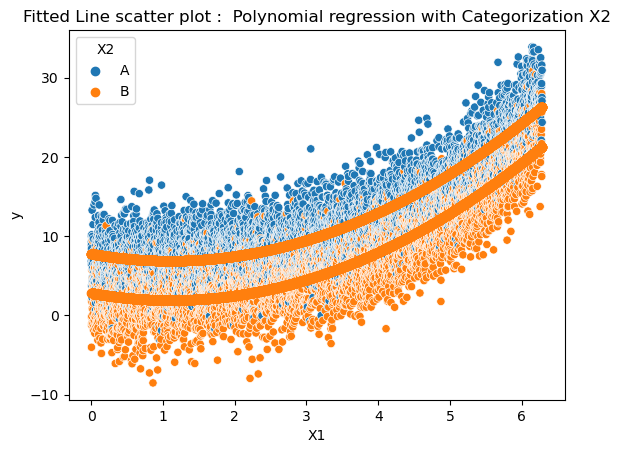

In [25]:
# if you want to see the difference between the below plot,
#  uncomment the next 2 lines & comment the other lines.
#  (leave these commented when submitting)
# plt.scatter(X_new.X1, y)
# plt.scatter(X_new.X1, y_pred)

# todo: add a proper title
plt.title('Fitted Line scatter plot :  Polynomial regression with Categorization X2')
sns.scatterplot(data=df, x='X1', y='y', hue='X2') 
plt.scatter(X_new.X1, y_pred)

# Interpretation
1. The background or scatter plot of blue and orange shows the actual plot of X1 on X axis and Y on Y axis.
2. The thicker lines represent the predicted polynomial regression models with the effect of A and B 
3. The Polynomial regression model using categorical variables captures the incrementing curve more accurately compared to simple and just polynomial regression.
4. The model has learnt to differentiate between A and B and has created two lines. The line for A is higher as the values were incremented by 5


<Axes: title={'center': 'Residuals Plot: Difference Between Polynomial Regression Predicted values with categorized variables and Actual Values of y'}>

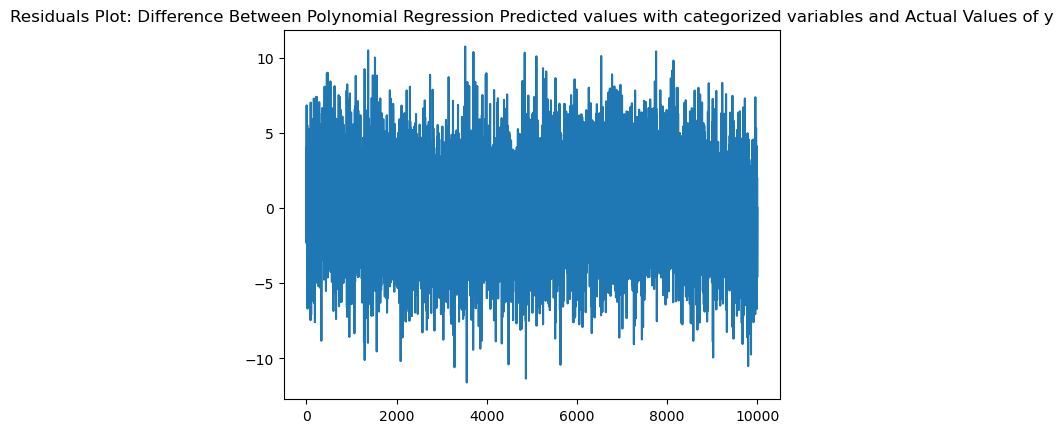

In [26]:
# todo: add a proper title

plt.title('Residuals Plot: Difference Between Polynomial Regression Predicted values with categorized variables and Actual Values of y') 
(y_pred-y).plot()

# Interpretation
1. The plot has predicted values - actual values on Y  axis and observations  on x axis.
2. The plot does not seem to have a discernable pattern which is good thing as the ideal plot is random and does not have any pattern 
3. The error is from values 10 and -10 and though there is disturbance the plot seems to be fairly consistent with no specific bias.
4. Model's performance looks fairly stable

<Axes: title={'center': 'Histogram of Residuals of Polynomial Regression with Categorized Values (y_pred -y ) '}>

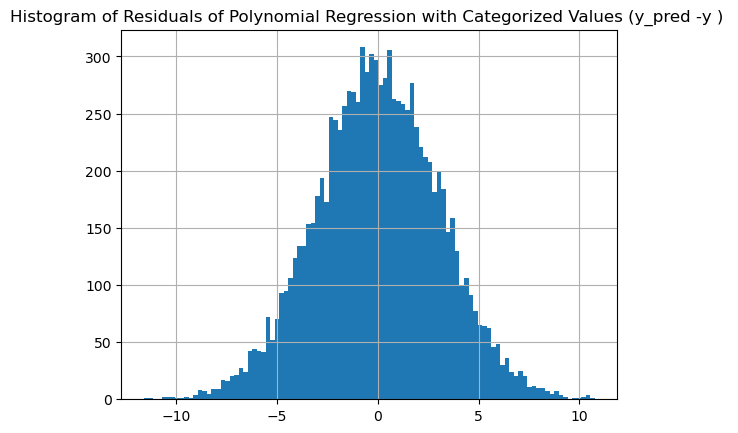

In [27]:
# todo: add a proper title
plt.title('Histogram of Residuals of Polynomial Regression with Categorized Values (y_pred -y ) ') 
(y_pred-y).hist(bins=100)

# Interpretation:
The Y axis has the y_pred-y values on x axis and the cound of residuals that fall into bins on Y axis
1. The plot is bell shaped which shows that the normal distrubtion has no bias
2. Comparitvely the the plot is more skewed towards 0 which shows improvement compared to the previous models
3. The error range is -10 to 10 which shows that there is not much error in the prediction

# Explain the result:
1. This current model captures the the categorization of A and B
2. Draws two different lines based on each category and captures the incrementing non linear curve
3. The residual plot does not have shape and the histogram shows that there is no bias
Conclusion : The polynomial regression with categorized values is better and has less errors and is evenly distributed which is more stable and correct compared to the normal regression and just polynomial regression

#### Todo: 
explain results

## Create a train-test split

In [28]:
#using train_test_split function creating a train  test  split. 75% of the data is used to train and 25% is used to test 
X_training, X_test, y_training, y_test = train_test_split(X, y)

print(f'Training samples: {X_training.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 7,500
Test samples: 2,500


 ## Train a linear regression model
  
 * Perform the model training on training set, follow the steps after `Finally` on the training set. 
 * Get the r2_score on the test set.
 
 Important note: When transforming use `fit_transform` on the training set and use `transform` on the test set.
 
 __eg:__
 
 `encoded_training = encoder.fit_transform(X_train[categorical_features])`
 
 `encoded_testing = encoder.transform(X_test[categorical_features])`
     

In [29]:
X_training.head()

,X1,X2
4848,3.046393,A
7238,4.548224,B
248,0.155839,A
6606,4.151087,A
8670,5.448066,A


In [30]:
# code
# X_training2 = X_training.copy()

# X_training2['isB'] = [ 1 if x == 'B' else 0  for x in X_training['X2']]
# X_training2.drop('X2', axis = 1, inplace=True)
# X_training2.head()

#dropping the first column as one can be deduced from the other parameter
encoder= OneHotEncoder(drop='first')
#.fit_transform fits the encoder and transforms this into a OneHotEncoded format
X_trainingEncoded = encoder.fit_transform(X_training[['X2']])

#creating a data frame by combining the X1 and encoded X2
X_training2 = pd.DataFrame({
    'X1': X_training.X1,
    'X2': X_trainingEncoded.toarray()[:, 0]
})
X_training2.head()


,X1,X2
4848,3.046393,0.0
7238,4.548224,1.0
248,0.155839,0.0
6606,4.151087,0.0
8670,5.448066,0.0


In [31]:
#creating an object M to train the linear regression model on the data 
m = LinearRegression().fit(X_training2, y_training)

# converting the Sparse Matrix to a Dense Array 
X_testEncoded = encoder.transform(X_test[['X2']])
X_test2 = pd.DataFrame({
    'X1': X_test.X1,
    'X2': X_testEncoded.toarray()[:, 0]
})
#checking the score
m.score(X_test2, y_test)

0.731204068551103

## Create a pipeline

Add comments to `todo` parts

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

cat_vars = ['X2']
num_vars = ['X1']

#Creating a pipeline fro the numerical column X1 to which polynomial feature expansion would be made 
num_pipeline = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2))
])

# Creating a pipeline for categorical data this will create one hot encoded features for the categorical A and B values
cat_pipeline = Pipeline([
    #onehot encoder transforms A and B to binary elements that can be processed. drop first drops the first column.
    ('create_dummies_cats', OneHotEncoder(handle_unknown='ignore', drop='first'))
])

# Combining the pipeline for numerical column and the categorical values. Applying the numpipeline to the num_vars and cat_pipline to cat_vars
processing_pipeline = ColumnTransformer(transformers=[
    ('num pipeline', num_pipeline, num_vars),
    ('cat pipeline', cat_pipeline, cat_vars)
])

#modeling pipeline processes both numerical and categorical data and then applies linear regression on it.
modeling_pipeline = Pipeline([('data_processing', processing_pipeline), 
                              ('lm', LinearRegression())
                             ])

print(modeling_pipeline)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])


In [33]:
#fitting the modeling pipeline on training data
modeling_pipeline.fit(X_training, y_training)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('num pipeline',
                                                  Pipeline(steps=[('polynomial_features',
                                                                   PolynomialFeatures())]),
                                                  ['X1']),
                                                 ('cat pipeline',
                                                  Pipeline(steps=[('create_dummies_cats',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['X2'])])),
                ('lm', LinearRegression())])

In [34]:
#Checking the r square data of the pipeline 
modeling_pipeline.score(X_test, y_test)

0.8194776490442535

## Evaluate/create residual plots

In [35]:
y_pred = modeling_pipeline.predict(X_test)
print(f'Shape of y_pred after correction: {y_pred.shape}')

Shape of y_pred after correction: (2500,)


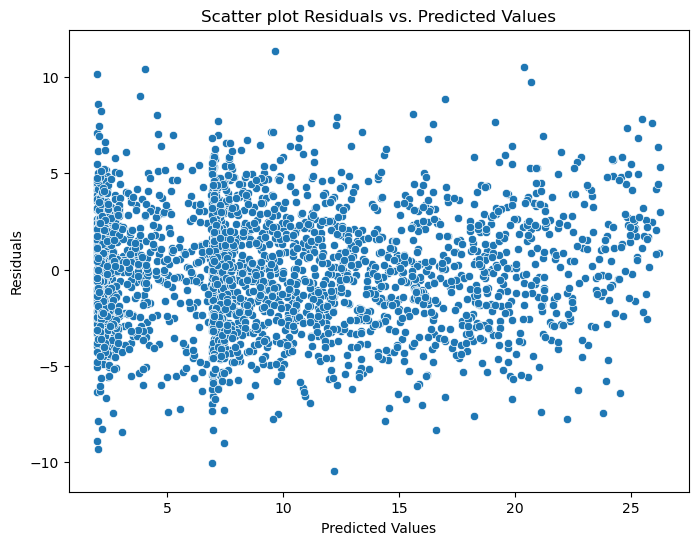

In [36]:
# Calculate residuals: Actual - Predicted
residuals = y_test - y_pred

#Residuals vs. Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Scatter plot Residuals vs. Predicted Values')
plt.show()



# Interpretation:
1. The residuals appear to be randomly distributed and theres no clear pattern. However, Their does appear to be some concentrations at the predicted values near 5 and 10.
2. The concentration near 0 residual is a good sign that the model is decent enough.
3. Spread is consistent and does not have a bias

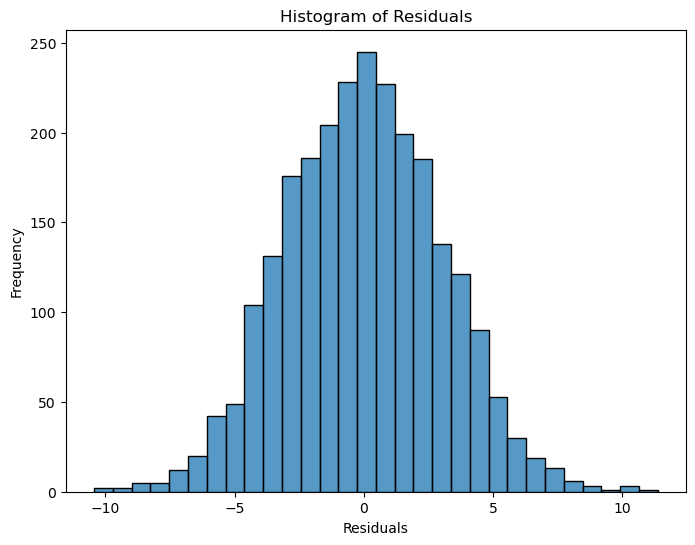

In [37]:

# Residual histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Interpretation:
1. This is a bell shped diagram which shows that the residuals are normally distributed and do not have a bias.
2. There are only some residuals at -7.5 and +7.5. The rest are majorly skewed at 0 and some are at +or - 2.5 and 5

## Explain findings

Explain findings